# Bitcoin Price Prediction Using RNN

We start with the imports we need.

In [1]:
from keras.layers import LSTM
from keras.layers import Dense
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Then, we load the data from a CSV file.

In [2]:
df = pd.read_csv('BTC-USD.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2765 entries, 0 to 2764
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2765 non-null   object 
 1   Open       2765 non-null   float64
 2   High       2765 non-null   float64
 3   Low        2765 non-null   float64
 4   Close      2765 non-null   float64
 5   Adj Close  2765 non-null   float64
 6   Volume     2765 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 151.3+ KB


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2.765000e+03
mean,902.872403,940.058471,859.501212,906.018582,906.018582,1.003075e+08
std,2367.786861,2482.354344,2216.822733,2372.348351,2372.348351,3.862603e+08
min,0.049510,0.049510,0.010000,0.049510,0.049510,0.000000e+00
25%,10.600000,10.940000,10.200000,10.600000,10.600000,3.603570e+05
50%,245.350006,251.570007,240.139999,246.139999,246.139999,5.215262e+06
75%,608.140015,614.400024,598.510010,608.609985,608.609985,2.401068e+07
max,19346.599609,19870.619141,18750.910156,19345.490234,19345.490234,6.245732e+09


In [5]:
Real_Price = df[['Date', 'Adj Close']]
Real_Price.index = Real_Price['Date']
Real_Price.drop(['Date'], axis=1, inplace=True)
Real_Price

/var/folders/26/x2snc4md15x1tj5_mzlnj2qm0000gn/T/ipykernel_13559/2210788344.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Real_Price.drop(['Date'], axis=1, inplace=True)


,Adj Close
Date,
2010-07-16,0.049510
2010-07-17,0.085840
2010-07-18,0.080800
2010-07-19,0.074740
2010-07-20,0.079210
...,...
2018-02-05,6937.080078
2018-02-06,7701.250000
2018-02-07,7592.720215


In [6]:
len(Real_Price)

2765

In [7]:
# split data
prediction_days = 30
df_train = Real_Price[:len(Real_Price)-prediction_days]
df_test = Real_Price[len(Real_Price)-prediction_days:]

# process data
training_set = df_train.values
training_set = np.reshape(training_set, (len(training_set), 1))
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

In [8]:
df_train

,Adj Close
Date,
2010-07-16,0.049510
2010-07-17,0.085840
2010-07-18,0.080800
2010-07-19,0.074740
2010-07-20,0.079210
...,...
2018-01-06,17172.300781
2018-01-07,16228.160156
2018-01-08,14976.169922


In [9]:
df_test

,Adj Close
Date,
2018-01-11,13308.059570
2018-01-12,13841.190430
2018-01-13,14243.120117
2018-01-14,13638.629883
2018-01-15,13631.980469
2018-01-16,11282.490234
2018-01-17,11162.700195
2018-01-18,11175.519531
2018-01-19,11521.759766


In [10]:
# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units=4, activation='sigmoid', input_shape=(None, 1)))

# Adding the output layer
regressor.add(Dense(units=1))

# Compiling the RNNregressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.compile(optimizer='adam', loss='mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size=5, epochs=100)

Epoch 1/100
547/547 [==============================] - 1s 801us/step - loss: 0.0110
Epoch 2/100
547/547 [==============================] - 0s 790us/step - loss: 0.0082
Epoch 3/100
547/547 [==============================] - 0s 758us/step - loss: 0.0065
Epoch 4/100
547/547 [==============================] - 0s 826us/step - loss: 0.0049
Epoch 5/100
547/547 [==============================] - 0s 799us/step - loss: 0.0033
Epoch 6/100
547/547 [==============================] - 0s 772us/step - loss: 0.0019
Epoch 7/100
547/547 [==============================] - 0s 797us/step - loss: 9.8366e-04
Epoch 8/100
547/547 [==============================] - 0s 794us/step - loss: 4.1628e-04
Epoch 9/100
547/547 [==============================] - 0s 854us/step - loss: 1.7016e-04
Epoch 10/100
547/547 [==============================] - 0s 775us/step - loss: 9.6008e-05
Epoch 11/100
547/547 [==============================] - 0s 762us/step - loss: 8.0593e-05
Epoch 12/100
547/547 [==============================] 

In [11]:
# Making the predictions
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = regressor.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)

1/1 [==============================] - 0s 131ms/step


In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import math

print(f"RMSE: {math.sqrt(mean_squared_error(test_set, predicted_BTC_price))}")
print(f"MAE: {mean_absolute_error(test_set, predicted_BTC_price)}")
print(f"MAPE: {mean_absolute_percentage_error(test_set, predicted_BTC_price)}")

RMSE: 157.97405620485492
MAE: 153.52527665416662
MAPE: 0.014896624339942427


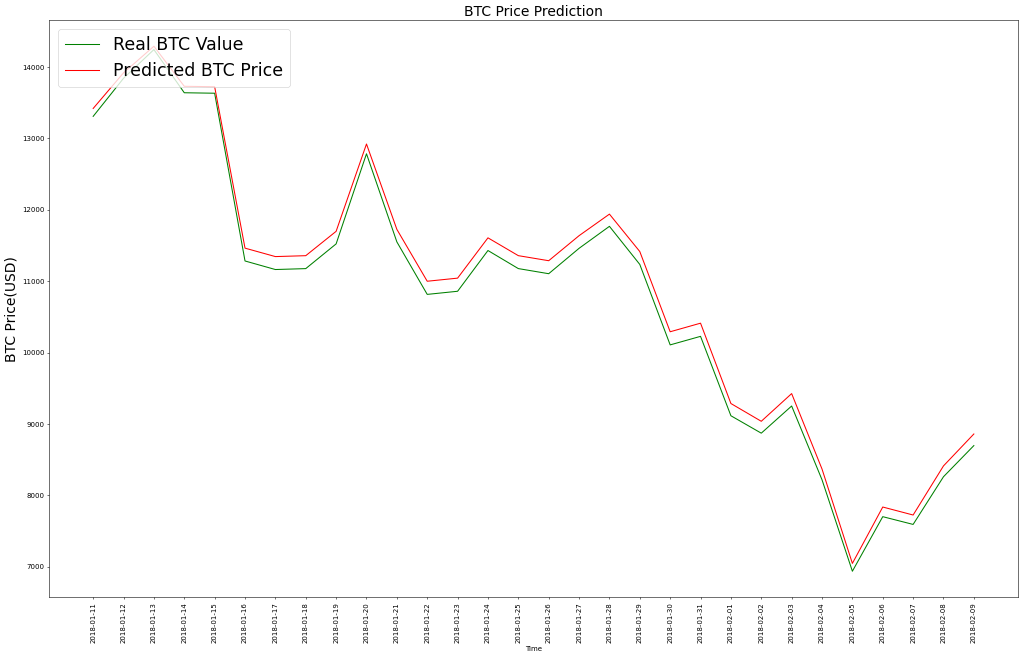

In [13]:
# Visualising the results
plt.figure(figsize=(25, 15), dpi=50, facecolor='w', edgecolor='k')
ax = plt.gca()
plt.plot(test_set, color='green', label='Real BTC Value')
plt.plot(predicted_BTC_price, color='red', label='Predicted BTC Price')
plt.title('BTC Price Prediction', fontsize=20)
df_test = df_test.reset_index()
x = df_test.index
labels = df_test['Date']
plt.xticks(x, labels, rotation='vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(10)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(10)
plt.xlabel('Time', fontsize=10)
plt.ylabel('BTC Price(USD)', fontsize=20)
plt.legend(loc=2, prop={'size': 25})
plt.show()